In [27]:
!pip install numpy
!pip install pandas

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
df=pd.read_csv("football.csv")
df= df.drop(columns=['contribution_type', 'player_tags', 'player_tags', 'club_name', 'short_name', 'sofifa_id'])

In [6]:
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns, prefix=categorical_columns, prefix_sep='_')
df.fillna(0, inplace=True)
df.columns

Index(['overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm',
       'weight_kg', 'club_team_id', 'league_level', 'club_jersey_number',
       ...
       'player_traits_Team Player',
       'player_traits_Team Player, Cautious With Crosses',
       'player_traits_Team Player, Cautious With Crosses, Saves with Feet',
       'player_traits_Team Player, Comes For Crosses',
       'player_traits_Team Player, Comes For Crosses, Saves with Feet',
       'player_traits_Team Player, Rushes Out Of Goal',
       'player_traits_Team Player, Rushes Out Of Goal, Comes For Crosses',
       'player_traits_Team Player, Saves with Feet',
       'player_traits_Team Player, Technical Dribbler (AI)',
       'player_traits_Technical Dribbler (AI)'],
      dtype='object', length=963)

In [7]:
result = df.groupby('club_team_id').mean()
result.reset_index(inplace=True)
result

,club_team_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_level,club_jersey_number,...,player_traits_Team Player,"player_traits_Team Player, Cautious With Crosses","player_traits_Team Player, Cautious With Crosses, Saves with Feet","player_traits_Team Player, Comes For Crosses","player_traits_Team Player, Comes For Crosses, Saves with Feet","player_traits_Team Player, Rushes Out Of Goal","player_traits_Team Player, Rushes Out Of Goal, Comes For Crosses","player_traits_Team Player, Saves with Feet","player_traits_Team Player, Technical Dribbler (AI)",player_traits_Technical Dribbler (AI)
0,0.0,69.524590,72.000000,0.000000e+00,0.000000,28.245902,184.934426,78.885246,0.0,0.000000,...,0.04918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.049180
1,1.0,80.272727,83.727273,2.959091e+07,82272.727273,25.454545,183.727273,76.727273,1.0,11.090909,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.000000
2,2.0,77.636364,82.000000,1.799091e+07,56545.454545,24.909091,182.454545,74.545455,1.0,10.909091,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,3.0,70.181818,76.272727,2.927273e+06,20363.636364,24.181818,183.000000,72.181818,2.0,12.181818,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.090909
4,4.0,65.363636,68.727273,9.613636e+05,3000.000000,26.363636,182.363636,76.727273,3.0,9.000000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,115530.0,71.272727,71.272727,2.345455e+06,10181.818182,25.000000,177.272727,73.545455,1.0,9.909091,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
698,115535.0,64.636364,70.545455,9.340909e+05,504.545455,25.636364,177.727273,71.545455,1.0,18.000000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
699,115536.0,61.818182,66.909091,5.718182e+05,500.000000,25.909091,182.000000,76.909091,1.0,14.818182,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
700,115716.0,62.909091,68.000000,7.881818e+05,2272.727273,25.636364,179.727273,75.272727,1.0,18.909091,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [9]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [11]:
distortions = []
k_range= range(1,15)
for k in k_range:
  kmeans= KMeans(n_clusters=k, random_state=35)
  kmeans.fit(result)
  distortions.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

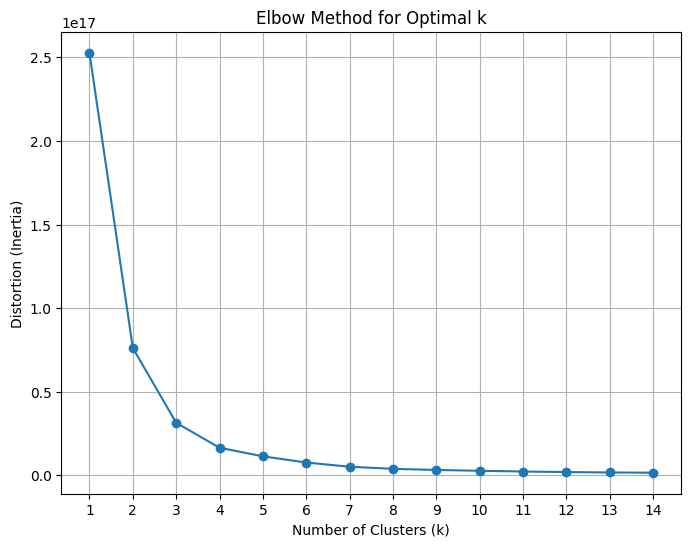

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(k_range, distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.xticks(k_range)
plt.grid()
plt.show()

In [17]:
# 4 is the optimal value for k
kmeans_4= KMeans(n_clusters=4, random_state=35)
y_predict=kmeans_4.fit_predict(result)
y_predict

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 2, 2, 0, 0, 1, 2, 2, 1, 1, 1, 0, 3, 0, 0, 3, 2, 2, 1, 2, 2, 3,
       0, 0, 0, 3, 2, 0, 0, 3, 0, 2, 2, 2, 2, 2, 2, 0, 2, 3, 3, 0, 0, 0,
       0, 3, 2, 2, 3, 2, 3, 3, 3, 1, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 2, 0, 0, 3, 0,
       0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 2, 2, 2, 1, 1, 1, 0, 2, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0,
       3, 0, 2, 2, 3, 3, 0, 2, 0, 2, 3, 3, 0, 3, 0, 3, 3, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3,

In [35]:
result1=result
result1['cluster number']=y_predict
result1.head()

,club_team_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_level,club_jersey_number,...,"player_traits_Team Player, Cautious With Crosses","player_traits_Team Player, Cautious With Crosses, Saves with Feet","player_traits_Team Player, Comes For Crosses","player_traits_Team Player, Comes For Crosses, Saves with Feet","player_traits_Team Player, Rushes Out Of Goal","player_traits_Team Player, Rushes Out Of Goal, Comes For Crosses","player_traits_Team Player, Saves with Feet","player_traits_Team Player, Technical Dribbler (AI)",player_traits_Technical Dribbler (AI),cluster number
0,0.0,69.524590,72.000000,0.000000e+00,0.000000,28.245902,184.934426,78.885246,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.049180,0
1,1.0,80.272727,83.727273,2.959091e+07,82272.727273,25.454545,183.727273,76.727273,1.0,11.090909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.000000,2
2,2.0,77.636364,82.000000,1.799091e+07,56545.454545,24.909091,182.454545,74.545455,1.0,10.909091,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,2
3,3.0,70.181818,76.272727,2.927273e+06,20363.636364,24.181818,183.000000,72.181818,2.0,12.181818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.090909,0
4,4.0,65.363636,68.727273,9.613636e+05,3000.000000,26.363636,182.363636,76.727273,3.0,9.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0


In [48]:
result2 = df.groupby('club_team_id').mean()
result2.reset_index(inplace=True)
x=result2['value_eur']
y=result2['wage_eur']
z=result2['release_clause_eur']
combined_result = pd.concat([x, y, z], axis=1)
combined_result

,value_eur,wage_eur,release_clause_eur
0,0.000000e+00,0.000000,0.000000e+00
1,2.959091e+07,82272.727273,5.940909e+07
2,1.799091e+07,56545.454545,3.572727e+07
3,2.927273e+06,20363.636364,6.136364e+06
4,9.613636e+05,3000.000000,1.766364e+06
...,...,...,...
697,2.345455e+06,10181.818182,4.463455e+06
698,9.340909e+05,504.545455,2.192273e+06
699,5.718182e+05,500.000000,1.311091e+06
700,7.881818e+05,2272.727273,1.179091e+06


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(combined_result, *['value_eur'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(combined_result, *['wage_eur'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(combined_result, *['release_clause_eur'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(combined_result, *['value_eur'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(combined_result, *['wage_eur'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(combined_result, *['release_clause_eur'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(combined_result, *[[['value_eur', 'wage_eur'], ['wage_eur', 'release_clause_eur']]], **{})
chart

In [51]:
distort = []
k_r= range(1,15)
for k in k_r:
  km= KMeans(n_clusters=k, random_state=35)
  km.fit(combined_result)
  distort.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

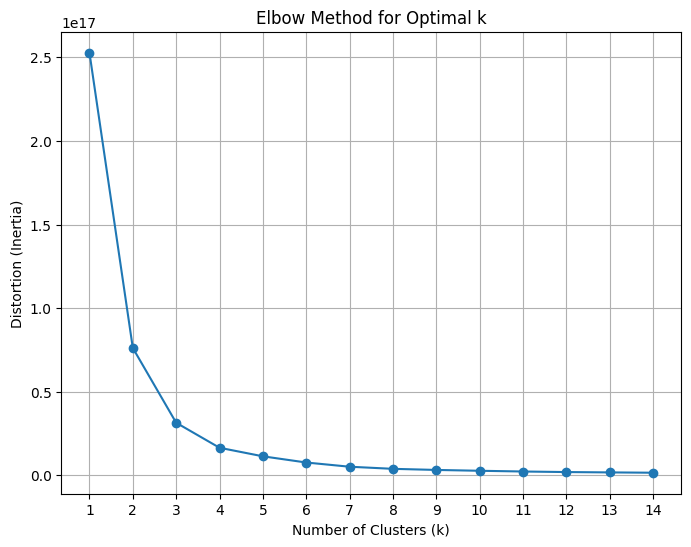

In [52]:
plt.figure(figsize=(8, 6))
plt.plot(k_r, distort, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.xticks(k_r)
plt.grid()
plt.show()

In [55]:
km1= KMeans(n_clusters=4, random_state=35)
y_prediction=km1.fit_predict(combined_result)
y_prediction

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 2, 2, 0, 0, 1, 2, 2, 1, 1, 1, 0, 3, 0, 0, 3, 2, 2, 1, 2, 2, 3,
       0, 0, 0, 3, 2, 0, 0, 3, 0, 2, 2, 2, 2, 2, 2, 0, 2, 3, 3, 0, 0, 0,
       0, 3, 2, 2, 3, 2, 3, 3, 3, 1, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 2, 0, 0, 3, 0,
       0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 2, 2, 2, 1, 1, 1, 0, 2, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0,
       3, 0, 2, 2, 3, 3, 0, 2, 0, 2, 3, 3, 0, 3, 0, 3, 3, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3,

In [56]:
qwe=combined_result
qwe['cluster number']=y_prediction
qwe.head()

,value_eur,wage_eur,release_clause_eur,cluster number
0,0.000000e+00,0.000000,0.000000e+00,0
1,2.959091e+07,82272.727273,5.940909e+07,2
2,1.799091e+07,56545.454545,3.572727e+07,2
3,2.927273e+06,20363.636364,6.136364e+06,0
4,9.613636e+05,3000.000000,1.766364e+06,0
